In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
NSAMPLES = 1000

## Toy generative model

In [3]:
def simulator(z):
    out = []
    for i in range(0, len(z), 2):
        r = ((z[i]-0.5)**2 + (z[i+1]-0.5)**2)**0.5
        mu = 1/(10*(r-0.2)**2+1e-2)
        out += [mu]
    x = np.random.poisson(out)
    return x

In [4]:
def noise(x, z):
    n = np.random.poisson(10., x.shape)
    return n + x

In [5]:
z0 = np.array([0.5, 0.7]*4)
zdim = len(z0)
x0 = noise(simulator(z0), z0)
comb1d = [[i] for i in range(zdim)]
comb2d = swyft.comb2d(range(zdim))
print(x0, z0)

[123 102 106 111] [0.5 0.7 0.5 0.7 0.5 0.7 0.5 0.7]


## Automatic inference 1-dim and 2-dim posteriors

In [6]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


In [7]:
intensity = swyft.get_unit_intensity(expected_n=NSAMPLES, dim=zdim)
cache.grow(intensity)
cache.simulate(simulator)

points = swyft.Points(cache, intensity, noise)
re = swyft.RatioEstimaor(points, combinations=comb1d, device=DEVICE)
re.train(max_epochs=MAX_EPOCHS, batch_size=16, lr_schedule=[1e-3, 3e-4, 1e-4])

# re_prev = None
# for r in range(1):
#     td = swyft.TrainData(x0 = x0, zdim = zdim, noisehook = noise, cache = ds, nsamples = NSAMPLES, threshold = 1e-6, parent = re_prev)
#     ds.simulate(simulator)
#     re = swyft.RatioEstimator(zdim, td, device = DEVICE, combinations = comb1d)
#     re.train(max_epochs = MAX_EPOCHS, nbatch = 16, lr_schedule = [1e-3, 3e-4, 1e-4])
#     re_prev = re

Simulate:  21%|██        | 207/984 [00:00<00:00, 2069.44it/s]

Adding 984 new samples. Run simulator!


Simulate: 100%|██████████| 984/984 [00:00<00:00, 1543.74it/s]


Initializing network...
yshape (shape of features between head and legs): 4
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 709.7840538024902
Validation loss: 709.7821979522705
Validation loss: 709.7823085784912
Total epochs: 3
LR iteration 1
Validation loss: 709.7813243865967
Validation loss: 709.7828197479248
Total epochs: 2
LR iteration 2
Validation loss: 709.7819538116455
Validation loss: 709.7818069458008
Validation loss: 709.7808113098145
Validation loss: 709.7809638977051
Total epochs: 4


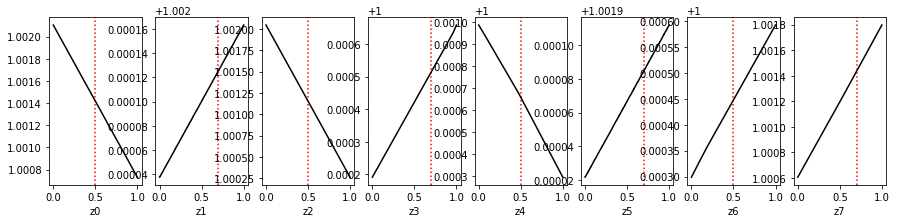

In [8]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (15, 3))

In [9]:
re2 = swyft.RatioEstimaor(points, combinations=comb1d, device=DEVICE)

In [10]:
re2.train(max_epochs = MAX_EPOCHS, batch_size = 16, lr_schedule = [1e-3, 3e-4, 1e-4])

Initializing network...
yshape (shape of features between head and legs): 4
Start training
LR iteration 0
Validation loss: 709.7834053039551
Validation loss: 709.7875728607178
Total epochs: 2
LR iteration 1
Validation loss: 709.7833271026611
Validation loss: 709.783655166626
Total epochs: 2
LR iteration 2
Validation loss: 709.7834949493408
Validation loss: 709.7832508087158
Validation loss: 709.7847881317139
Total epochs: 3


ValueError: [0, 1] is not in list

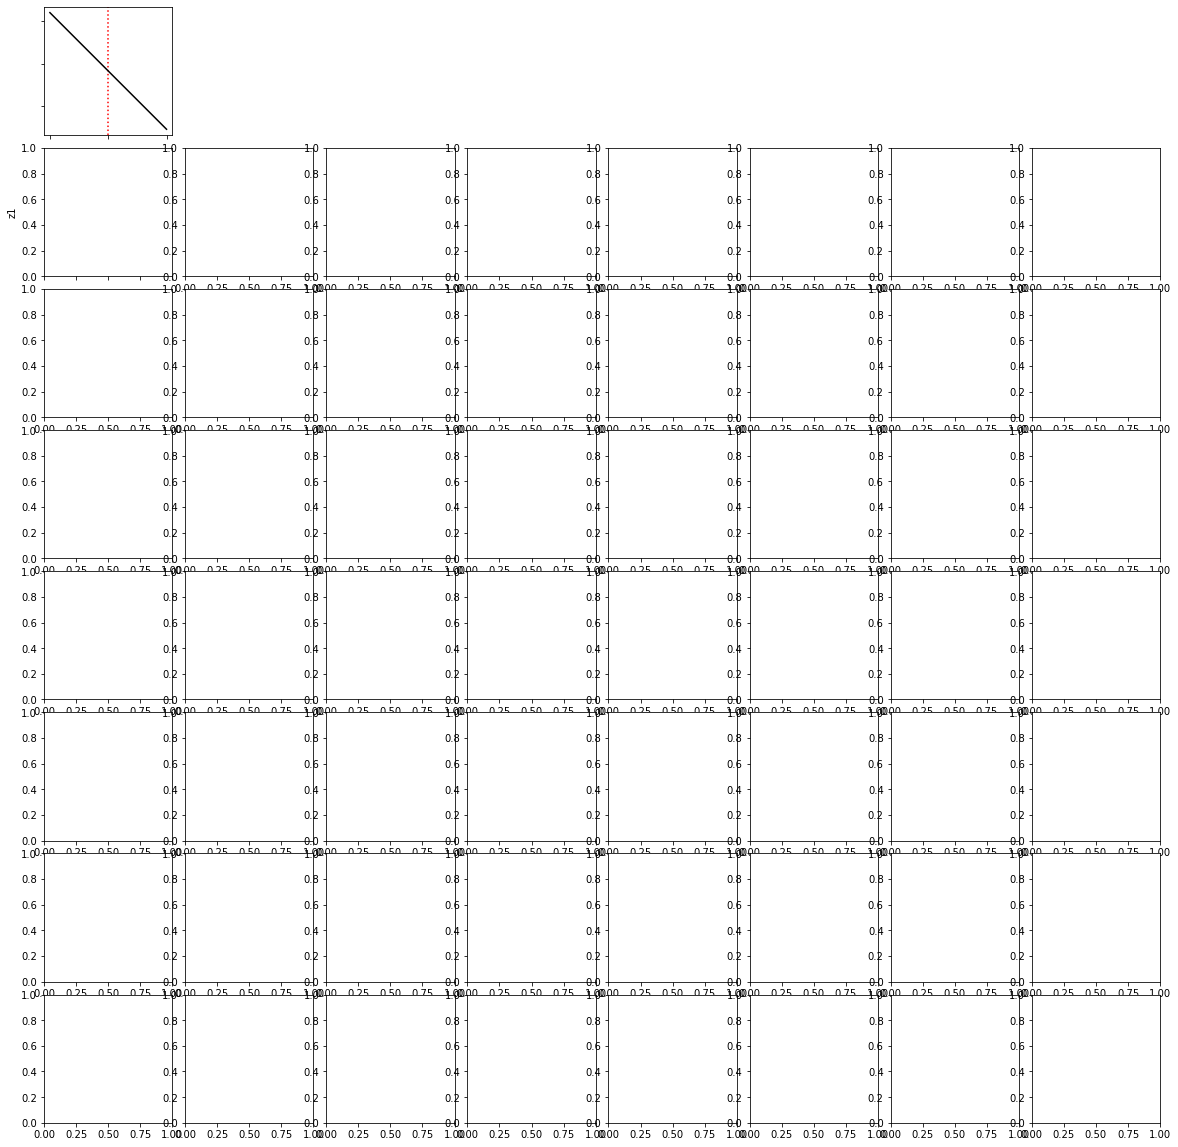

In [11]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 20)

In [ ]:
z0B = np.array([0.5, 0.8]*4)
x0B = noise(simulator(z0B), z0B)
swyft.corner(re, re2, x0 = x0B, z0 = z0B, cmap = 'Greys', dim = 20)

In [ ]:
z0B = np.array([0.5, 0.9]*4)
x0B = noise(simulator(z0B), z0B)
swyft.corner(re, re2, x0 = x0B, z0 = z0B, cmap = 'Greys', dim = 20)